# 图像特效-中值滤波

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [15]:
#添加图像噪声
def salt(src,num):
    if type(src) == type(None):
        return None
    dst = src.copy()
    if len(src.shape) == 3 and src.shape[2] == 3:
        rows,cols,_ = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = (255,255,255)
    elif len(src.shape) == 2:
        rows,cols = src.shape
        for n in range(num):
            y = np.random.randint(rows - 1)
            x = np.random.randint(cols - 1)
            dst[y,x] = 255
    else:
        return None
    
    return dst

In [16]:
src_noise_pepper = salt(gray,5000)

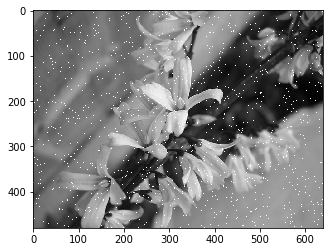

In [17]:
plt.imshow(src_noise_pepper,'gray')

In [18]:
def median_filter(src,ksize=3):
    dst = signal.medfilt2d(src,ksize)
    return dst.astype(np.uint8)

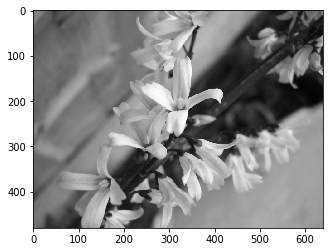

In [19]:
dst = median_filter(src_noise_pepper)
plt.imshow(dst,'gray')